In [1]:
from IPython.display import Image # for displaying screenshot of entity relationship diagram
import sqlite3 # for connecting to and querying SQL database

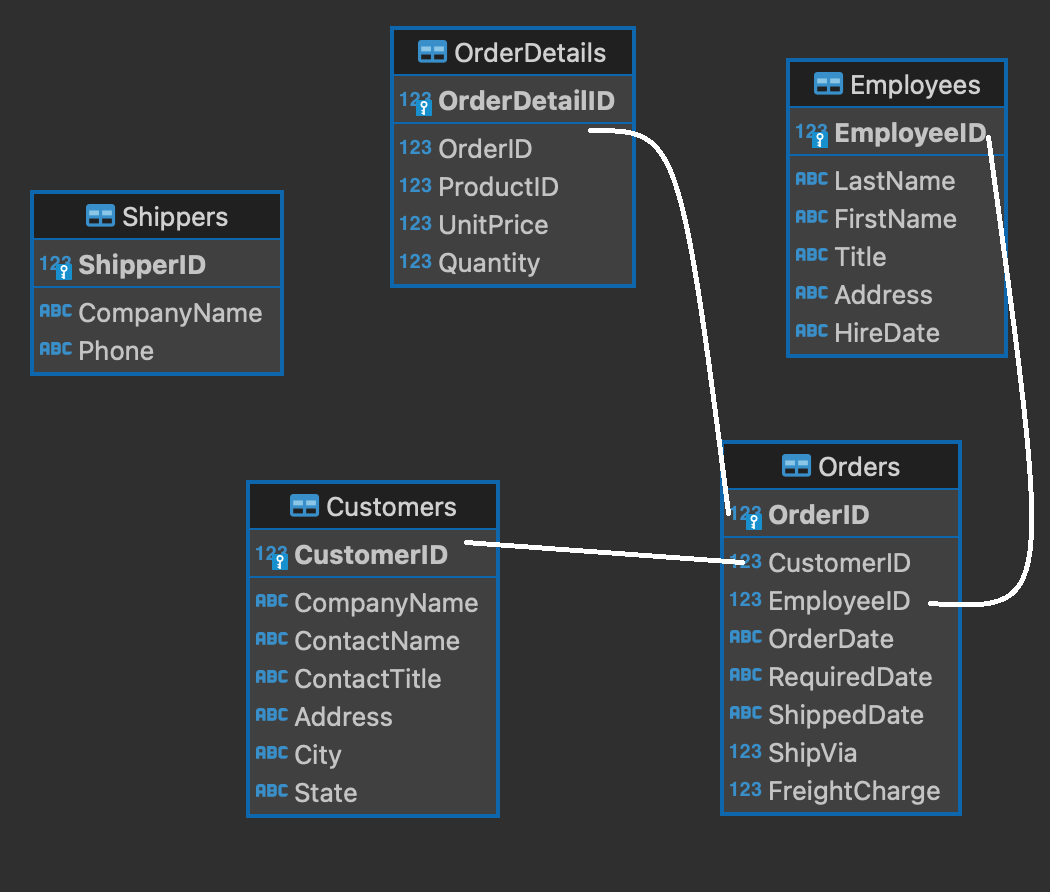

In [2]:
# entity relationship diagram for 'ecommerce.sqlite' database
# 'Orders' at the center, links to 'OrderDetails', 'Customers', and 'Employees'
# notice 'OrderDetails', 'Customers', and 'Employees' do not link to each other directly
# must link for 'Orders' which acts as central "hub"
# 'Shippers' not linked to rest of database 

Image('diagrams/ecommerce_erd.png')

In [3]:
conn = sqlite3.connect('data/ecommerce.sqlite') # connect to database
db = conn.cursor() # create cursor object which can perform sql commands

In [4]:
def counts(db):
    # return the number of entries in each table in the database
    for table in ['Customers','Shippers','Employees','Orders','OrderDetails']: # iterating through tables, multiple queries
        query = f"""
                SELECT COUNT(*)
                FROM {table}
                """
        db.execute(query)
        results = db.fetchone()
        print(f"{table}: {results[0]}")

counts(db)

Customers: 6
Shippers: 4
Employees: 4
Orders: 20
OrderDetails: 47


In [5]:
def query_orders(db):
    # return a list of orders displaying all columns
    query = """
            SELECT *
            FROM Orders
            ORDER BY orders.OrderID ASC
            """
    results = db.execute(query)
    results = results.fetchall()
    return results

query_orders(db)

[(1, 1, 1, '2012-01-04', '2012-01-09', '2012-01-05', 1, 3.75),
 (2, 2, 2, '2012-01-27', '2012-02-01', '2012-01-28', 1, 7.25),
 (3, 4, 1, '2012-02-19', '2012-02-24', '2012-02-23', 2, 5.5),
 (4, 2, 4, '2012-03-13', '2012-03-18', '2012-03-14', 2, 13.5),
 (5, 4, 2, '2012-04-05', '2012-04-10', '2012-04-06', 3, 8.75),
 (6, 3, 3, '2012-04-28', '2012-05-03', '2012-04-29', 2, 11.0),
 (7, 4, 3, '2012-05-21', '2012-05-26', '2012-05-22', 1, 11.25),
 (8, 1, 4, '2012-06-13', '2012-06-18', '2012-06-14', 4, 13.5),
 (9, 2, 1, '2012-07-06', '2012-07-11', '2012-07-07', 3, 4.75),
 (10, 3, 2, '2012-07-29', '2012-08-03', '2012-08-04', 1, 7.75),
 (11, 3, 3, '2012-08-21', '2012-08-26', '2012-08-22', 4, 11.5),
 (12, 1, 4, '2012-09-13', '2012-09-18', '2012-09-14', 2, 13.0),
 (13, 5, 3, '2012-10-06', '2012-10-11', '2012-10-07', 3, 12.25),
 (14, 2, 2, '2012-10-29', '2012-11-03', '2012-10-30', 2, 7.5),
 (15, 4, 2, '2012-11-21', '2012-11-26', '2012-11-22', 1, 8.25),
 (16, 3, 4, '2012-12-14', '2012-12-19', '2012-12-

In [6]:
def get_orders_range(db, date_from, date_to):
    # return a list of orders displaying all columns with OrderDate between date_from and date_to
    # (excluding date_from and including date_to)
    query = """
            SELECT * FROM Orders
            WHERE OrderDate BETWEEN ? AND ? AND OrderDate IS NOT ?
            ORDER BY OrderDate

            """
    # '? BETWEEN ? AND IS NOT ?' comparison operators same as '? >= AND <= ? AND != ?'
    # ? placeholders used for parameter substitution, protects against SQL injection attacks.
    params = (date_from, date_to, date_from) # 'params' tuple, length matches numbers of ? placeholders, passed in sequence...
    results = db.execute(query,params) # after query as 'execute()' method's second argument
    results = results.fetchall()
    return results

get_orders_range(db, '2012-01-01', '2012-06-01')


[(1, 1, 1, '2012-01-04', '2012-01-09', '2012-01-05', 1, 3.75),
 (2, 2, 2, '2012-01-27', '2012-02-01', '2012-01-28', 1, 7.25),
 (3, 4, 1, '2012-02-19', '2012-02-24', '2012-02-23', 2, 5.5),
 (4, 2, 4, '2012-03-13', '2012-03-18', '2012-03-14', 2, 13.5),
 (5, 4, 2, '2012-04-05', '2012-04-10', '2012-04-06', 3, 8.75),
 (6, 3, 3, '2012-04-28', '2012-05-03', '2012-04-29', 2, 11.0),
 (7, 4, 3, '2012-05-21', '2012-05-26', '2012-05-22', 1, 11.25)]

In [7]:
def get_waiting_time(db):
    # get a list with all the orders displaying each column 
    # and calculate an extra TimeDelta column displaying the number of days
    # between OrderDate and ShippedDate, ordered by ascending TimeDelta
    query = """
            SELECT *, JULIANDAY(ShippedDate) - JULIANDAY(OrderDate) AS waiting_time
            FROM Orders
            ORDER BY waiting_time
            """
    # JULIANDAY() converts date to float value representing number of days passed since Nov 24, 4714 BC
    # this allows us to do arithmatic on dates and calculate elapsed time 
    # like subtracting 'OrderDate' from 'ShippedDate' to calculate number of days it took for each order to ship
    results = db.execute(query)
    results = results.fetchall()
    return results

get_waiting_time(db)


[(1, 1, 1, '2012-01-04', '2012-01-09', '2012-01-05', 1, 3.75, 1.0),
 (2, 2, 2, '2012-01-27', '2012-02-01', '2012-01-28', 1, 7.25, 1.0),
 (4, 2, 4, '2012-03-13', '2012-03-18', '2012-03-14', 2, 13.5, 1.0),
 (5, 4, 2, '2012-04-05', '2012-04-10', '2012-04-06', 3, 8.75, 1.0),
 (6, 3, 3, '2012-04-28', '2012-05-03', '2012-04-29', 2, 11.0, 1.0),
 (7, 4, 3, '2012-05-21', '2012-05-26', '2012-05-22', 1, 11.25, 1.0),
 (8, 1, 4, '2012-06-13', '2012-06-18', '2012-06-14', 4, 13.5, 1.0),
 (9, 2, 1, '2012-07-06', '2012-07-11', '2012-07-07', 3, 4.75, 1.0),
 (11, 3, 3, '2012-08-21', '2012-08-26', '2012-08-22', 4, 11.5, 1.0),
 (12, 1, 4, '2012-09-13', '2012-09-18', '2012-09-14', 2, 13.0, 1.0),
 (13, 5, 3, '2012-10-06', '2012-10-11', '2012-10-07', 3, 12.25, 1.0),
 (14, 2, 2, '2012-10-29', '2012-11-03', '2012-10-30', 2, 7.5, 1.0),
 (15, 4, 2, '2012-11-21', '2012-11-26', '2012-11-22', 1, 8.25, 1.0),
 (16, 3, 4, '2012-12-14', '2012-12-19', '2012-12-15', 2, 14.0, 1.0),
 (17, 5, 1, '2013-01-06', '2013-01-11', '

In [8]:
def detailed_orders(db):
    '''return a list of all orders (order_id, customer.contact_name,
    employee.firstname) ordered by order_id'''
    query = """
            SELECT orders.OrderID, customers.ContactName, employees.FirstName
            FROM Orders
            JOIN Customers ON orders.CustomerID = customers.CustomerID
            JOIN Employees ON orders.EmployeeID = employees.EmployeeID
            """
    # multiple joins in one query: 'Orders' to 'Customers' and 'Orders' to 'Employees' 
    # enables us to combine columns from all 3 tables
    # must link 'Customers' -> 'Orders' -> 'Employees' to match who sold what to whom
    # because 'Customers' and 'Employees' tables not linked directly
    results = db.execute(query)
    results = results.fetchall()
    return results

detailed_orders(db)

[(1, 'Dick Terrcotta', 'James'),
 (2, 'Barbara Berber', 'Patty'),
 (3, 'Toni Faucet', 'James'),
 (4, 'Barbara Berber', 'Lisa'),
 (5, 'Toni Faucet', 'Patty'),
 (6, 'Jim Wood', 'Robert'),
 (7, 'Toni Faucet', 'Robert'),
 (8, 'Dick Terrcotta', 'Lisa'),
 (9, 'Barbara Berber', 'James'),
 (10, 'Jim Wood', 'Patty'),
 (11, 'Jim Wood', 'Robert'),
 (12, 'Dick Terrcotta', 'Lisa'),
 (13, 'Jack Diamond III', 'Robert'),
 (14, 'Barbara Berber', 'Patty'),
 (15, 'Toni Faucet', 'Patty'),
 (16, 'Jim Wood', 'Lisa'),
 (17, 'Jack Diamond III', 'James'),
 (18, 'Jim Wood', 'Robert'),
 (19, 'Barbara Berber', 'Lisa'),
 (20, 'Jim Wood', 'James')]

In [9]:
def spent_per_customer(db):
    '''return the total amount spent per customer ordered by ascending total
    amount (to 2 decimal places)
    Exemple :
        Jean   |   100
        Marc   |   110
        Simon  |   432
        ...
    '''
    query = '''
        SELECT
            Customers.ContactName,
            SUM(details.UnitPrice * details.Quantity) AS cumulative_amount
        FROM OrderDetails AS details
        JOIN Orders ON details.OrderID = Orders.OrderId
        JOIN Customers ON Orders.CustomerID = Customers.CustomerID
        GROUP BY ContactName
        ORDER BY cumulative_amount
    '''
    # 'FROM OrderDetails AS details' assigns alias 'details' to table 'OrderDetails'
    # allows shorter referencing to the table (now can use 'details.OrderID' instead of 'OrderDetails.OrderID')
    # (alias only exists for duration of query)
    # JOIN 'Customers -> 'Orders' -> 'details' tables so customers can be linked to purchases 
    # 'GROUP BY ContactName' groups customers together to allow performing aggregate SUM() function for each customer...
    # 'SUM(details.UnitPrice * details.Quantity) AS 'cumulative_amount' creates new column aggregating total spent per customer
    return db.execute(query).fetchall()
    results = db.execute(query)
    results = results.fetchall()
    return results

spent_per_customer(db)


[('Jim Wood', 1597.9),
 ('Dick Terrcotta', 2021.7),
 ('Jack Diamond III', 2192.6000000000004),
 ('Barbara Berber', 5156.200000000001),
 ('Toni Faucet', 8700.1)]

In [10]:
def best_employee(db):
    '''Implement the best_employee method to determine who’s the best employee! 
    By “best employee”, we mean the one who sells the most.'''
    query = """
        SELECT
            Employees.FirstName,
            Employees.LastName,
            SUM(details.UnitPrice * details.Quantity) AS cumulative_amount
        FROM OrderDetails AS details
        JOIN Orders ON details.OrderID = Orders.OrderID
        JOIN Employees ON Employees.EmployeeID = Orders.EmployeeID
        GROUP BY Employees.EmployeeID
        ORDER BY cumulative_amount DESC
        LIMIT 1
    """
    # same as last query but this time linking 'Employees' -> 'Orders' -> 'details' tables
    # so that employees can be linked to purchases
    # 'GROUP BY Emploees.ID' groups employees together to allow performing aggregate SUM() function for each employee...
    # 'GROUP BY ContactName' groups customers together to allow performing aggregate SUM() function for each customer...
    # 'SUM(details.UnitPrice * details.Quantity) AS 'cumulative_amount' creates new column aggregating total sold per employee
    results = db.execute(query)
    results = results.fetchone()
    return results

best_employee(db)

('Patty', 'Lee', 7945.6)

In [11]:
def orders_per_customer(db):
    '''return a list of tuples where each tuple contains the contactName
    of the customer and the number of orders they made (contactName,
    number_of_orders). Order the list by ascending number of orders'''
    query = """
    SELECT
    customers.ContactName,
    orders.CustomerID
    FROM Customers
    LEFT JOIN Orders ON orders.CustomerID = customers.CustomerID
    """
    # 'GROUP BY orders.CustomerID' groups by customer to allow performing aggregate COUNT() of orders per customer
    # 'FROM Customers LEFT JOIN Orders' means return *all* rows from 'Customers' even those that don't have any matches in 'Orders' table...
    # rows without match will 
    results = db.execute(query)
    results = results.fetchall()
    return results

orders_per_customer(db)

[('Dick Terrcotta', 1),
 ('Dick Terrcotta', 1),
 ('Dick Terrcotta', 1),
 ('Barbara Berber', 2),
 ('Barbara Berber', 2),
 ('Barbara Berber', 2),
 ('Barbara Berber', 2),
 ('Barbara Berber', 2),
 ('Jim Wood', 3),
 ('Jim Wood', 3),
 ('Jim Wood', 3),
 ('Jim Wood', 3),
 ('Jim Wood', 3),
 ('Jim Wood', 3),
 ('Toni Faucet', 4),
 ('Toni Faucet', 4),
 ('Toni Faucet', 4),
 ('Toni Faucet', 4),
 ('Jack Diamond III', 5),
 ('Jack Diamond III', 5),
 ('Sebastien Saunier', None)]

In [12]:
def orders_per_customer(db):
    '''return a list of tuples where each tuple contains the contactName
    of the customer and the number of orders they made (contactName,
    number_of_orders). Order the list by ascending number of orders'''
    query = """
    SELECT
    customers.ContactName,
    COUNT(orders.CustomerID) AS number_of_orders
    FROM Customers
    LEFT JOIN Orders ON customers.CustomerID = orders.CustomerID
    GROUP BY orders.CustomerID
    ORDER BY number_of_orders
    """
    # 'GROUP BY orders.CustomerID' groups by customer to allow performing aggregate COUNT() of orders per customer
    # 'FROM Customers LEFT JOIN Orders' means keep *all* rows from 'Customers'
    # even those that don't have any 'customers.CustomerID = orders.CustomerID' match on the JOIN
    # in that case, just fill their 'orders.CustomerID' column with NULL
    # (in other words, keep rows of customers even if they didn't make any purchases)
    # this way 'COUNT(orders.CustomersID)' together with 'GROUP BY orders.CustomerID'
    # will still aggregate 'number_of_orders' per customer for customers that didn't buy anything
    # their count will just be 0
    # thus "(Sebastien Saunier', 0)" still appears in our results
    # try changing LEFT JOIN to JOIN (default INNER JOIN) which *only* keeps rows where there was a match
    # and Sebastien will disappear from the list!
    results = db.execute(query)
    results = results.fetchall()
    return results

orders_per_customer(db)


[('Sebastien Saunier', 0),
 ('Jack Diamond III', 2),
 ('Dick Terrcotta', 3),
 ('Toni Faucet', 4),
 ('Barbara Berber', 5),
 ('Jim Wood', 6)]

In [13]:
def order_rank_per_customer(db):
    '''rank the orders of each customer according to the order date.'''
    query = """
    SELECT OrderID, CustomerID, OrderDate,
    RANK() OVER (
        PARTITION BY CustomerID
        ORDER BY OrderDate
        ) AS OrderRank
    FROM Orders
    """
    # RANK() OVER(...) is a type of window function
    # window functions are similar to aggregate functions
    # but instead of using 'GROUP BY' to reduce rows and return one aggregate value per group
    # they use 'PARTITION BY' to group but *not* reduce rows, and perform calculations on them
    # which are based on their relation to other rows in the same partition 
    # in this case partitioning rows by 'CustomerID', ordering rows within each partition by 'OrderDate'
    # and creating a new column 'OrderRank' which ranks the order in each partition according to order date
    # (1 = first order, 2 = second order, 3 = third order, etc.)
    results = db.execute(query)
    results = results.fetchall()
    return results

order_rank_per_customer(db)

[(1, 1, '2012-01-04', 1),
 (8, 1, '2012-06-13', 2),
 (12, 1, '2012-09-13', 3),
 (2, 2, '2012-01-27', 1),
 (4, 2, '2012-03-13', 2),
 (9, 2, '2012-07-06', 3),
 (14, 2, '2012-10-29', 4),
 (19, 2, '2013-02-21', 5),
 (6, 3, '2012-04-28', 1),
 (10, 3, '2012-07-29', 2),
 (11, 3, '2012-08-21', 3),
 (16, 3, '2012-12-14', 4),
 (18, 3, '2013-01-29', 5),
 (20, 3, '2013-03-16', 6),
 (3, 4, '2012-02-19', 1),
 (5, 4, '2012-04-05', 2),
 (7, 4, '2012-05-21', 3),
 (15, 4, '2012-11-21', 4),
 (13, 5, '2012-10-06', 1),
 (17, 5, '2013-01-06', 2)]

In [14]:
def order_cumulative_amount_per_customer(db):
    '''compute the cumulative amount (in USD) of the orders of each customer according to the order date.'''
    query = """
        SELECT
            Orders.OrderID,
            Orders.CustomerID,
            Orders.OrderDate,
            SUM(SUM(OrderDetails.UnitPrice * OrderDetails.Quantity)) OVER(
                PARTITION BY Orders.CustomerID
                ORDER BY Orders.OrderDate) 
                AS OrderCumulativeAmount
        FROM Orders
        JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
        GROUP BY Orders.OrderID
    """
    # 'SUM(OrderDetails.UnitPrice * OrderDetails.Quantity)' together with 'GROUP BY Orders.OrderID' aggregates *total $ per order*
    #  'PARTITION BY Orders.CustomerID ORDER BY Orders.OrderDate' partitions *orders according to customer sorted by order date* (oldest-> most recent)
    # SUM(*total $ per order*) OVER (*orders according to customer sorted by order date*) returns *running totals* of $ spent by each customer by date AS 'OrderCumulativeAmount'
    results = db.execute(query)
    results = results.fetchall()
    return results

order_cumulative_amount_per_customer(db)


[(1, 1, '2012-01-04', 48.0),
 (8, 1, '2012-06-13', 1989.7),
 (12, 1, '2012-09-13', 2021.7),
 (2, 2, '2012-01-27', 1948.7000000000003),
 (4, 2, '2012-03-13', 2348.7000000000003),
 (9, 2, '2012-07-06', 2648.7000000000003),
 (14, 2, '2012-10-29', 3529.7000000000003),
 (19, 2, '2013-02-21', 5156.200000000001),
 (6, 3, '2012-04-28', 384.5),
 (10, 3, '2012-07-29', 517.7),
 (11, 3, '2012-08-21', 938.9000000000001),
 (16, 3, '2012-12-14', 1146.4),
 (18, 3, '2013-01-29', 1431.9),
 (20, 3, '2013-03-16', 1597.9),
 (3, 4, '2012-02-19', 2395.9),
 (5, 4, '2012-04-05', 6034.5),
 (7, 4, '2012-05-21', 7356.0),
 (15, 4, '2012-11-21', 8700.1),
 (13, 5, '2012-10-06', 250.0),
 (17, 5, '2013-01-06', 2192.6000000000004)]

In [15]:
def get_average_purchase(db):
    # return the average amount spent per order for each customer ordered by customer ID
    request = '''
        WITH OrderTotals AS (
          SELECT
            SUM(OrderDetails.UnitPrice * OrderDetails.Quantity) AS total,
            OrderDetails.OrderID
          FROM OrderDetails
          GROUP BY OrderDetails.OrderID
        )
        SELECT
             Customers.CustomerID,
            ROUND(AVG(OrderTotals.total), 2) AS average
        FROM Customers 
        JOIN Orders ON Customers.CustomerID = Orders.CustomerID
        JOIN OrderTotals ON OrderTotals.OrderID = Orders.OrderID
        GROUP BY Customers.CustomerID
        ORDER BY Customers.CustomerID
    '''
    # subquery factoring ('WITH *temporarytablename* AS (*subquery*)' syntax) used to create temporary tables
    # which can then be queried just like any other table 
    # this allows for nesting SQL queries, reduced repetition, and simplified statements
    # in this case we create the temporary table 'OrderTotals' containing two columns:
    # 'orderID' (taken from 'OrderDetails.OrderID') 
    # and 'total' (total cost per order, aggregated through SUM() with GROUP BY() like in previous examples)
    # we then query 'OrderTotals' and JOIN it with 'Customers' (through an intermediate JOIN with 'Orders')
    # this allows us to GROUP BY 'Customers.CustomerID' and calculate the AVG() 'OrderTotals.total' per customer AS 'average'
    return db.execute(request).fetchall()

get_average_purchase(db)


[(1, 673.9), (2, 1031.24), (3, 266.32), (4, 2175.03), (5, 1096.3)]

In [16]:
def get_general_avg_order(db):
    # return the average amount spent per order
    request = '''
        WITH OrderTotals AS (
          SELECT SUM(OrderDetails.Quantity * OrderDetails.UnitPrice) AS total
          FROM OrderDetails 
          GROUP BY OrderDetails.OrderID
        )
        SELECT ROUND(AVG(OrderTotals.total), 2)
        FROM OrderTotals
    '''
    # create temporary table 'OrderTotals'
    # containing 'total' column (total cost per order, aggregated through SUM() with GROUP BY() like in previous examples)
    # query 'Ordertotals.total' calculating AVG() of *all* its rows (because no GROUP BY clause)
    # this returns a single value: the average order cost
    return db.execute(request).fetchone()[0]

get_general_avg_order(db)


983.43

In [17]:
def best_customers(db):
    # return the customers who have an average purchase greater than the general average purchase
    request = '''
        WITH OrderTotals AS (
          SELECT
            SUM(OrderDetails.UnitPrice * OrderDetails.Quantity) AS total,
            OrderDetails.OrderID
          FROM OrderDetails
          GROUP BY OrderDetails.OrderID
        ),
        GeneralOrderTotal AS (
          SELECT ROUND(AVG(OrderTotals.total), 2) AS general_average
          FROM OrderTotals
        ),
        CustomerOrderTotal AS (
          SELECT
            Customers.CustomerID,
            ROUND(AVG(OrderTotals.total), 2) AS average
          FROM Customers
          JOIN Orders ON Customers.CustomerID = Orders.CustomerID
          JOIN OrderTotals ON OrderTotals.OrderID = Orders.OrderID
          GROUP BY Customers.CustomerID
          ORDER BY Customers.CustomerID
        )
        SELECT
            CustomerOrderTotal.CustomerID,
            CustomerOrderTotal.average
        FROM CustomerOrderTotal
        WHERE CustomerOrderTotal.average > (SELECT general_average FROM GeneralOrderTotal)
        ORDER BY CustomerOrderTotal.average DESC
    '''
    # combines elements of last two examples: average order cost *per customer* and average cost of *all* orders
    # create 3 temporary tables using WITH AS syntax
    # first table 'OrderTotals' containing 'total' column (total cost per order, aggregated through SUM() with GROUP BY() like in previous examples)
    # second table 'GeneralOrderTotal' containing 'general_average' column with just one row: average order cost 
    # (calculated by 'AVG(Ordertotals.total') with no 'GROUP BY' just like in 'get_general_avg_order()' example)
    # third table 'CustomerOrderTotal' containing 'average' column (average order cost per customer)
    # (calculated by 'AVG(OrderTotals.total)' with 'GROUP BY Customers.CustomerID' just like in 'get_average_purchase()' example)
    # finally, query 'CustomerOrderTotal' selecting only rows WHERE 'average' order cost is higher than the 'general_average' FROM 'GeneralOrderTotal'
    # thus returning only those customers whose average purchase is greater than the general average purchase
    return db.execute(request).fetchall()

best_customers(db)


[(4, 2175.03), (5, 1096.3), (2, 1031.24)]

In [18]:
def top_ordered_product_per_customer(db):
    # return the list of the top ordered product by each customer based on the total ordered amount in USD
    query = """
        WITH OrderedProducts AS (
            SELECT
                CustomerID,
                ProductID, 
                SUM(OrderDetails.Quantity * OrderDetails.UnitPrice) AS ProductTotal
            FROM OrderDetails
            JOIN Orders ON OrderDetails.OrderID = Orders.OrderID
            GROUP BY Orders.CustomerID, OrderDetails.ProductID
            ORDER BY ProductTotal DESC
        )
        SELECT
            CustomerID,
            ProductID,
            MAX(ProductTotal) AS TopProductTotal
        FROM OrderedProducts
        GROUP BY CustomerID
        ORDER BY TopProductTotal DESC
    """
    # create temporary table 'OrderedProducts'
    # 'SUM(OrderDetails.Quantity * OrderDetails.UnitPrice)' gets total, but *not* per order like in previous examples...
    # because the accompanying GROUP BY isn't 'OrderID' this time, but 'CustomerID, ProductID'
    # this means aggregate SUM() grouped by rows where 'CustomerID' and 'ProductID' *both* match
    # thus returning total spent per product per customer AS 'ProductTotal'
    # then SELECT the MAX() 'ProductTotal' grouped by 'CustomerID'
    # this returns one product per customer: their top ordered product based on total $ spent
    return db.execute(query).fetchall()

top_ordered_product_per_customer(db)


[(4, 6, 5876.0),
 (2, 5, 2791.6000000000004),
 (1, 6, 1909.7),
 (3, 3, 1200.0),
 (5, 6, 1175.2)]

In [19]:
def average_number_of_days_between_orders(db):
    # return the average number of days between two consecutive orders of the same customer
    query = """
        WITH DatedOrders AS (
            SELECT
                CustomerID,
                OrderID,
                OrderDate,
                LAG(OrderDate, 1) OVER (PARTITION BY CustomerID) AS PreviousOrderDate
            FROM Orders)
        SELECT ROUND(AVG(JULIANDAY(OrderDate) - JULIANDAY(PreviousOrderDate))) AS avg_days_between
        FROM DatedOrders
    """
    # create temporary table 'DatedOrders' taking 'CustomerID', 'OrderID', and 'OrderDate' columns from 'Orders'
    # and creating new column 'PreviousOrderDate' with LAG() OVER() window function
    # 'LAG ('OrderDate', 1)' means the new column 'PreviousOrderDate' should return the value from 'OrderDate' offset by 1
    # aka the 'OrderDate' of the preceding row (default NULL for the first row because it has no preceding row!)
    # 'OVER (PARTITION BY CustomerID)' means apply the LAG() seperately to each customer 
    # so first 'PreviousOrderDate' for each customer will default NULL and offset from there 
    # then apply JULIANDAY() to 'OrderDate' and 'PreviousOrderDate'
    # allowing us to subtract 'PreviousOrderDate' from 'OrderDate' to calculate elapsed time between consecutive orders by the same customer
    # (wherever 'PreviousOrderDate' is NULL, aka each customer's first order, no calculation made)
    # then calculate AVG() applied to these elapsed times to finally return a single value: 'avg_days_between'
    # the average number of days between between  two consecutive orders of the same customer 
    return int(db.execute(query).fetchone()[0])

average_number_of_days_between_orders(db)


89